<img src="https://www.th-koeln.de/img/logo.svg" style="float:right;" width="200">

# 1st exercise: <font color="#C70039">Work with standard deviations for anomaly detection</font>
* Course: AML
* Lecturer: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Author of notebook: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Name: <a href="https://www.gernotheisenberg.de/">Rubaiya Kabir Pranti</a>
* Matriculation Number: <a href="https://www.gernotheisenberg.de/"> 11146364</a>
* Date:   16.01.2024

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Standard_deviation_diagram.svg/1200px-Standard_deviation_diagram.svg.png" style="float: center;" width="450">

---------------------------------
**GENERAL NOTE 1**: 
Please make sure you are reading the entire notebook, since it contains a lot of information on your tasks (e.g. regarding the set of certain paramaters or a specific computational trick), and the written mark downs as well as comments contain a lot of information on how things work together as a whole. 

**GENERAL NOTE 2**: 
* Please, when commenting source code, just use English language only. 
* When describing an observation please use English language, too
* This applies to all exercises throughout this course.  

---------------------

### <font color="ce33ff">DESCRIPTION</font>:
This notebook allows you for getting into standard deviations as a common technique to detect anomalies when the data is normally distributed. 

-------------------------------------------------------------------------------------------------------------

### <font color="FFC300">TASKS</font>:
The tasks that you need to work on within this notebook are always indicated below as bullet points. 
If a task is more challenging and consists of several steps, this is indicated as well. 
Make sure you have worked down the task list and commented your doings. 
This should be done by using markdown.<br> 
<font color=red>Make sure you don't forget to specify your name and your matriculation number in the notebook.</font>

**YOUR TASKS in this exercise are as follows**:
1. import the notebook to Google Colab or use your local machine.
2. make sure you specified you name and your matriculation number in the header below my name and date. 
    * set the date too and remove mine.
3. read the entire notebook carefully 
    * add comments whereever you feel it necessary for better understanding
    * run the notebook for the first time.
    * understand the output
4. go and find three different data sets on the web 
    * kaggle.com might be a good source (they also offer an API for data download)
    * make sure two of the three data sets are normally distributed
    * download one data set that is not normally distributed
5. visualize the data
6. compute the anomalies
7. visualize the anomalies
8. does the 0,3% rule apply?
9. what are differences between the normally distributed and the non-normally distributed data sets with respect to the outlier detection? 
10. which statement can be made and which cannot? 
-----------------------------------------------------------------------------------

<u><font size="4"> **Datasets Used:**</u></font> <br>

<font size="4"><u>**Normally Distributed:**</u></font>

- **<span style="background-color:white">[Graduate Admissions](https://www.kaggle.com/datasets/mohansacharya/graduate-admissions)</span>**
- **<span style="background-color:white">[Boston Housing Dataset](https://www.kaggle.com/datasets/vikrishnan/boston-house-prices)</span>**

<font size="4"><u> **Not Normally Distributed:**</u></font>

- **<span style="background-color:white">[Climate Dataset](https://www.kaggle.com/datasets/mohansacharya/graduate-admissions)</span>**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [2]:
# Function to Detection Outlier on one-dimentional datasets.
def find_anomalies(random_data):
    #define a list to accumlate anomalies
    anomalies = []
    
    # Set upper and lower limit to 3 standard deviation
    random_data_std = np.std(random_data)
    random_data_mean = np.mean(random_data)
    anomaly_cut_off = random_data_std * 3
    
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    
    print("lower limit=", round(lower_limit,8))
    print("upper limit=", round(upper_limit,8))
    
    # Generate outliers list
    for outlier in random_data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    
    return anomalies

## 1. Admission Prediction Dataset (Normally distributed)

In [3]:
# loading csv dataset
df1 = pd.read_csv('C:/Users/rubai/AML/my_datasets/normally_dist/Admission_Predict.csv')
# only CGPA column is normally distributed
data1 = df1['CGPA'].values

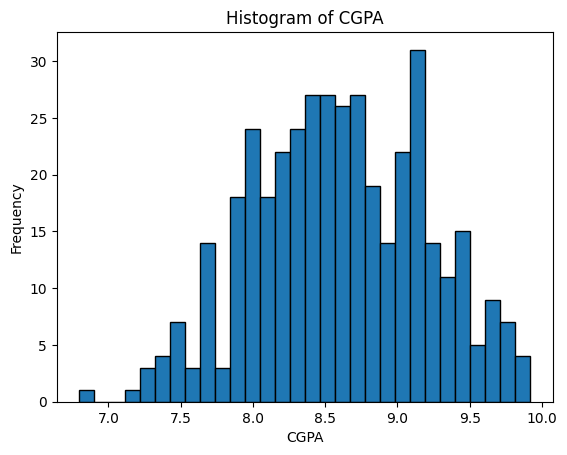

In [4]:
# checking if the column is normally distributed or not
# plotting histogram
plt.hist(data1, bins=30, edgecolor='black')
plt.title('Histogram of CGPA')
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.show()

Mean of standardized CGPA: 7.771561172376096e-16
Standard Deviation of standardized CGPA: 1.0012523486435176


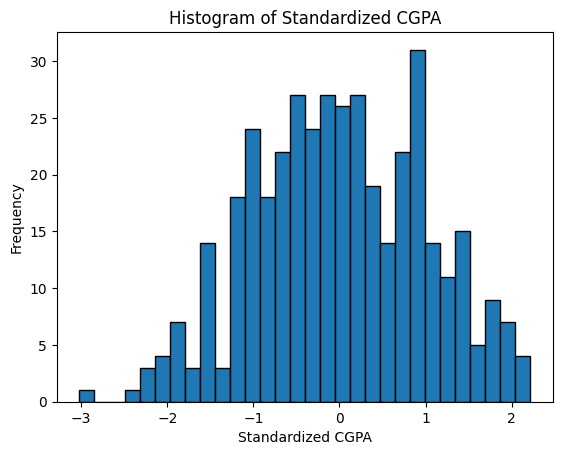

In [5]:
#standardizing the CGPA column
df1['CGPA_standardized'] = (data1 - data1.mean()) / data1.std()
#checking the mean and std dev of the standardized CGPA
mean_std = df1['CGPA_standardized'].mean()
std_dev_std = df1['CGPA_standardized'].std()

print(f'Mean of standardized CGPA: {mean_std}')
print(f'Standard Deviation of standardized CGPA: {std_dev_std}')
# plotting histogram of standardized CGPA
plt.hist(df1['CGPA_standardized'], bins=30, edgecolor='black')
plt.title('Histogram of Standardized CGPA')
plt.xlabel('Standardized CGPA')
plt.ylabel('Frequency')
plt.show()

In [6]:
anomalies1 = find_anomalies(data1)

lower limit= 6.8122113
upper limit= 10.3856387


In [7]:
print(anomalies1)

[6.8]


In [8]:
# mean and standard deviation
mean = np.mean(data1)
std_dev = np.std(data1)
# Z-scores for anomalies
z_scores = [(x - mean) / std_dev for x in anomalies1]
# if anomalies are outside the 0.3% rule
for i, z in enumerate(z_scores):
    if z > 3:
        print(f"anomaly {anomalies1[i]} lies in the upper 0.15%.")
    elif z < -3:
        print(f"anomaly {anomalies1[i]} lies in the lower 0.15%.")
    else:
        print(f"anomaly {anomalies1[i]} is within the 99.7% range.")

anomaly 6.8 lies in the lower 0.15%.


## <font color="FFC300">Comments</font>:

8. does the 0,3% rule apply? 
- Yes, the above data is normally distributed and 6.8 is within 0.15% to be anomaly.
9. what are differences between the normally distributed and the non-normally distributed data sets with respect to the outlier detection? 
- Normally distributed data has the bell curve and centered around the mean point and can have any mean and standard deviation values. Not normally distributed data are not symmetric/like a bell curve. These can be skewed, uniform distributions etc.
10. which statement can be made and which cannot? 
- The 0.3% rule is specific to normal distributions and the IQR can be used with any type of distribution.

# 2. Boston Housing Dataset (Normally distributed)

In [9]:
# loading csv dataset
df2 = pd.read_csv('C:/Users/rubai/AML/my_datasets/normally_dist/HousingData.csv')
# only RM column is normally distributed
data2 = df2['RM'].values

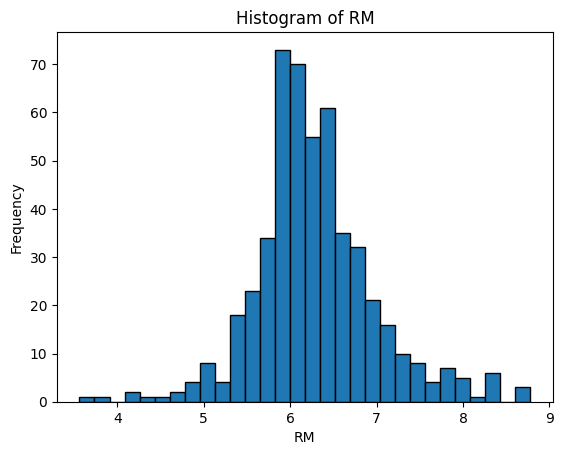

In [10]:
# checking if the column is normally distributed or not
# plotting histogram
plt.hist(data2, bins=30, edgecolor='black')
plt.title('Histogram of RM')
plt.xlabel('RM')
plt.ylabel('Frequency')
plt.show()

Mean of standardized RM: -1.0882818581305882e-16
Standard Deviation of standardized RM: 1.0009896093465716


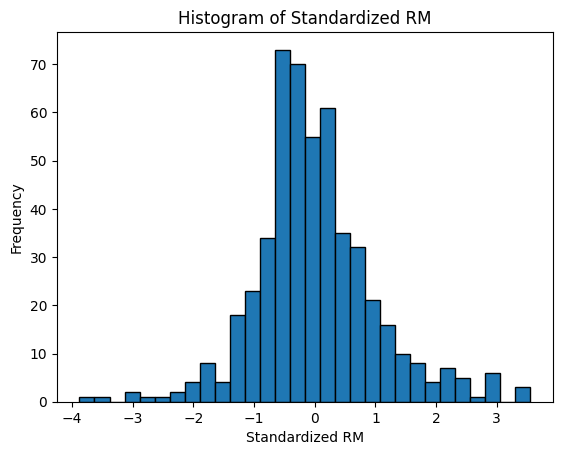

In [11]:
#standardizing the RM column
df2['RM_standardized'] = (data2 - data2.mean()) / data2.std()
#checking the mean and std dev of the standardized RM
mean_std = df2['RM_standardized'].mean()
std_dev_std = df2['RM_standardized'].std()

print(f'Mean of standardized RM: {mean_std}')
print(f'Standard Deviation of standardized RM: {std_dev_std}')
# plotting histogram of standardized RM
plt.hist(df2['RM_standardized'], bins=30, edgecolor='black')
plt.title('Histogram of Standardized RM')
plt.xlabel('Standardized RM')
plt.ylabel('Frequency')
plt.show()

In [12]:
anomalies2 = find_anomalies(data2)

lower limit= 4.17886684
upper limit= 8.39040193


In [13]:
print(anomalies2)

[8.725, 8.704, 8.398, 8.78, 3.561, 3.863, 4.138, 4.138]


In [14]:
# mean and standard deviation
mean = np.mean(data2)
std_dev = np.std(data2)
# Z-scores for anomalies
z_scores = [(x - mean) / std_dev for x in anomalies2]
# if anomalies are outside the 0.3% rule
for i, z in enumerate(z_scores):
    if z > 3:
        print(f"anomaly {anomalies2[i]} lies in the upper 0.15%.")
    elif z < -3:
        print(f"anomaly {anomalies2[i]} lies in the lower 0.15%.")
    else:
        print(f"anomaly {anomalies2[i]} is within the 99.7% range.")

anomaly 8.725 lies in the upper 0.15%.
anomaly 8.704 lies in the upper 0.15%.
anomaly 8.398 lies in the upper 0.15%.
anomaly 8.78 lies in the upper 0.15%.
anomaly 3.561 lies in the lower 0.15%.
anomaly 3.863 lies in the lower 0.15%.
anomaly 4.138 lies in the lower 0.15%.
anomaly 4.138 lies in the lower 0.15%.



## <font color="FFC300">Comments</font>:
8. does the 0,3% rule apply? 
- Yes, the above data is normally distributed and above points are within upper and lower 0.15% to be anomalies.
9. what are differences between the normally distributed and the non-normally distributed data sets with respect to the outlier detection? 
- Normally distributed data has the bell curve and centered around the mean point and can have any mean and standard deviation values. Not normally distributed data are not symmetric/like a bell curve. These can be skewed, uniform distributions etc.
10. which statement can be made and which cannot? 
- The 0.3% rule is specific to normal distributions and the IQR can be used with any type of distribution.

# 3. Climate Dataset (Not normally distributed)

In [15]:
# loading csv dataset
df3 = pd.read_csv('C:/Users/rubai/AML/my_datasets/not_normal/DailyDelhiClimateTrain.csv')
# only wind column is normally distributed
data3 = df3['wind_speed'].values

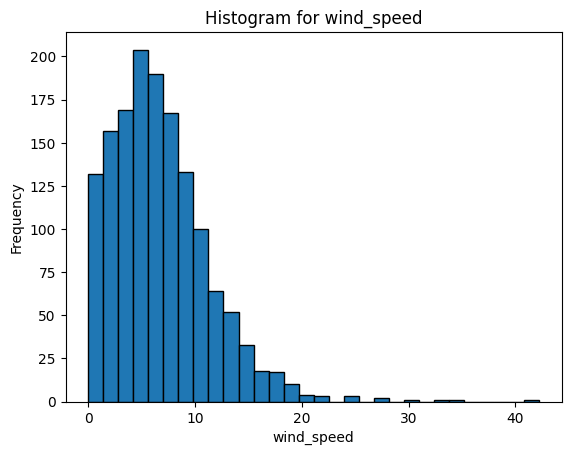

In [16]:
# checking if the column is normally distributed or not
# plotting histogram
plt.hist(data3, bins=30, edgecolor='black')
plt.title('Histogram for wind_speed')
plt.xlabel('wind_speed')
plt.ylabel('Frequency')
plt.show()

Mean of standardized wind_speed: -1.9440293728046516e-16
Standard Deviation of standardized wind_speed: 1.0003421728072759


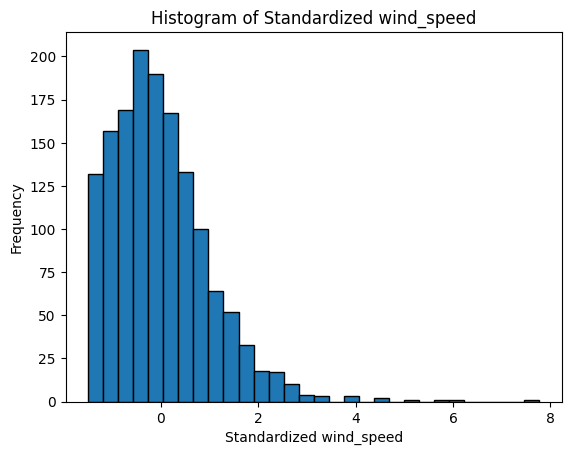

In [17]:
#standardizing the wind_speed column
df3['wind_speed_standardized'] = (data3 - data3.mean()) / data3.std()
#checking the mean and std dev of the standardized wind_speed
mean_std = df3['wind_speed_standardized'].mean()
std_dev_std = df3['wind_speed_standardized'].std()

print(f'Mean of standardized wind_speed: {mean_std}')
print(f'Standard Deviation of standardized wind_speed: {std_dev_std}')
# plotting histogram of standardized wind_speed
plt.hist(df3['wind_speed_standardized'], bins=30, edgecolor='black')
plt.title('Histogram of Standardized wind_speed')
plt.xlabel('Standardized wind_speed')
plt.ylabel('Frequency')
plt.show()

In [18]:
anomalies3 = find_anomalies(data3)

lower limit= -6.87791678
upper limit= 20.48233427


In [19]:
print(anomalies3)

[24.066666666666663, 42.22, 34.4875, 27.3375, 20.6, 24.325, 20.825, 30.685714285714283, 25.0125, 21.3, 27.775, 33.325, 22.1, 21.30625]


In [20]:
# mean and standard deviation
mean = np.mean(data3)
std_dev = np.std(data3)
# Z-scores for anomalies
z_scores = [(x - mean) / std_dev for x in anomalies3]

# if anomalies are outside the 0.3% rule
for i, z in enumerate(z_scores):
    if z > 3:
        print(f"anomaly {anomalies3[i]} lies in the upper 0.15%.")
    elif z < -3:
        print(f"anomaly {anomalies3[i]} lies in the lower 0.15%.")
    else:
        print(f"anomaly {anomalies3[i]} is within the 99.7% range.")

anomaly 24.066666666666663 lies in the upper 0.15%.
anomaly 42.22 lies in the upper 0.15%.
anomaly 34.4875 lies in the upper 0.15%.
anomaly 27.3375 lies in the upper 0.15%.
anomaly 20.6 lies in the upper 0.15%.
anomaly 24.325 lies in the upper 0.15%.
anomaly 20.825 lies in the upper 0.15%.
anomaly 30.685714285714283 lies in the upper 0.15%.
anomaly 25.0125 lies in the upper 0.15%.
anomaly 21.3 lies in the upper 0.15%.
anomaly 27.775 lies in the upper 0.15%.
anomaly 33.325 lies in the upper 0.15%.
anomaly 22.1 lies in the upper 0.15%.
anomaly 21.30625 lies in the upper 0.15%.



## <font color="FFC300">Comments</font>:
8. does the 0,3% rule apply? 
- Ideally, should not be applied. The above data, a skewed dataset(one particular column) is not-normally distributed and we applied 0.3% rule yet, and above mentioned points are within upper and lower 0.15% limits to be anomalies.Tthe results may not accurately reflect the true nature of outliers in our data.
9. what are differences between the normally distributed and the non-normally distributed data sets with respect to the outlier detection? 
- Normally distributed data has the bell curve and centered around the mean point and can have any mean and standard deviation values. Not normally distributed data are not symmetric/like a bell curve. These can be skewed, uniform distributions etc.
10. which statement can be made and which cannot? 
- The 0.3% rule is specific to normal distributions and the IQR can be used with any type of distribution.